In [1]:
import pandas as pd

import matplotlib.pyplot as plt

plt.figure()
plt.close()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
plt.rcParams.update({'font.size': 22})

In [4]:
FIGSIZE = (8,8)

In [5]:
data = pd.read_csv('./data/DataList.csv')

data.head()

,num,full_name,osmsc_id,image_id,sub_id,Modality,segtype,seg_subtype,gender,age
0,0,0001_0001,1.0,OSMSC0001,1,CT,cerebral,normal,F,30.0
1,1,0002_0001,2.0,OSMSC0002,1,CT,coronary,normal,F,63.0
2,2,0003_0001,3.0,OSMSC0003,1,CT,aortofemoral,normal,F,21.0
3,3,0004_0001,4.0,OSMSC0004,1,CT,aortofemoral,lower,F,23.0
4,4,0005_1001,5.0,OSMSC0005,1001,CT,Pulmonary,normal,F,67.0


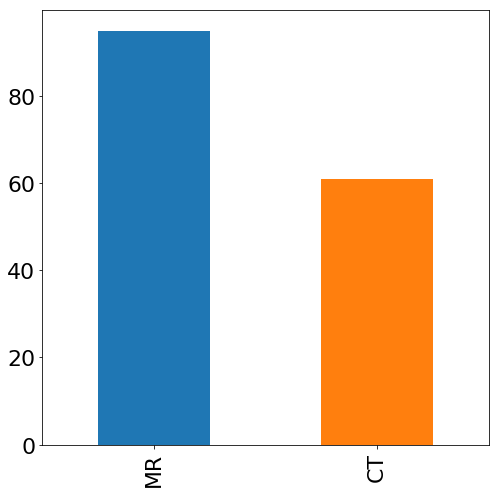

In [6]:
plt.figure(figsize=FIGSIZE)
data['Modality'].value_counts().plot(kind='bar')
plt.show()

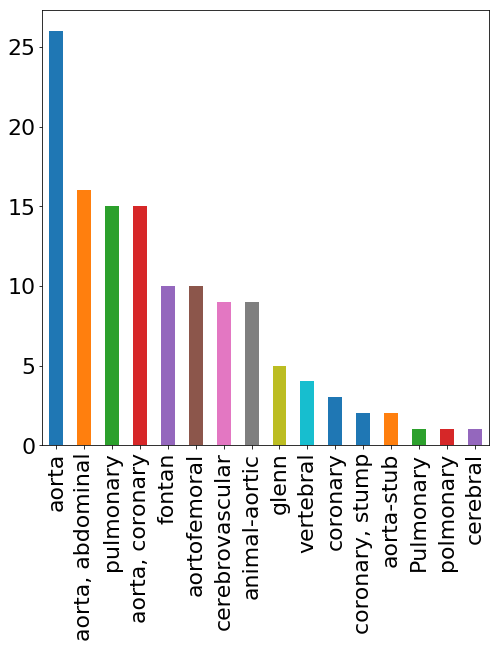

In [7]:
plt.figure(figsize=FIGSIZE)
data['segtype'].value_counts().plot(kind='bar')
plt.show()

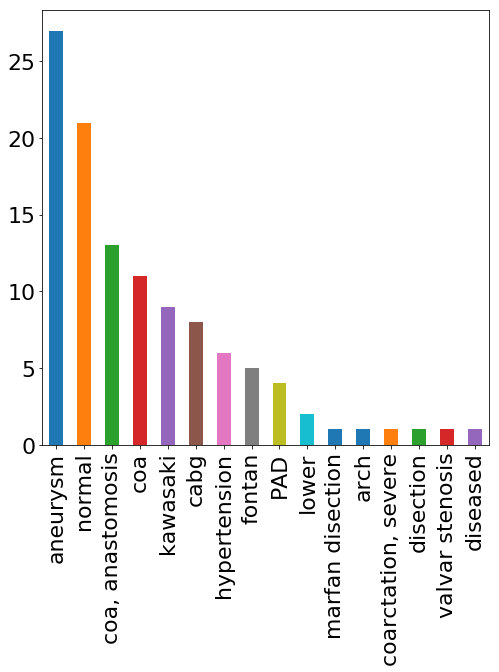

In [8]:
plt.figure(figsize=FIGSIZE)
data['seg_subtype'].value_counts().plot(kind='bar')
plt.show()

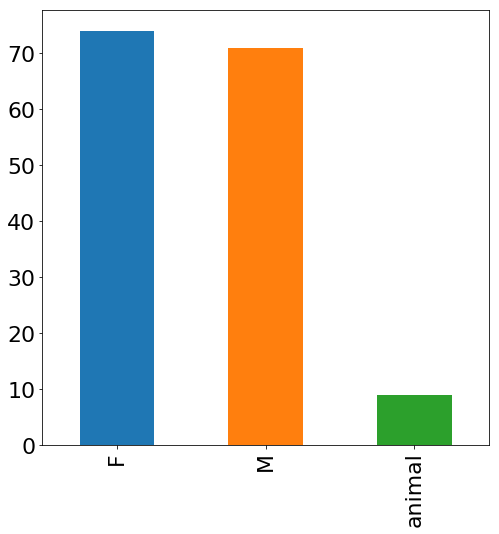

In [9]:
plt.figure(figsize=FIGSIZE)
data['gender'].value_counts().plot(kind='bar')
plt.show()

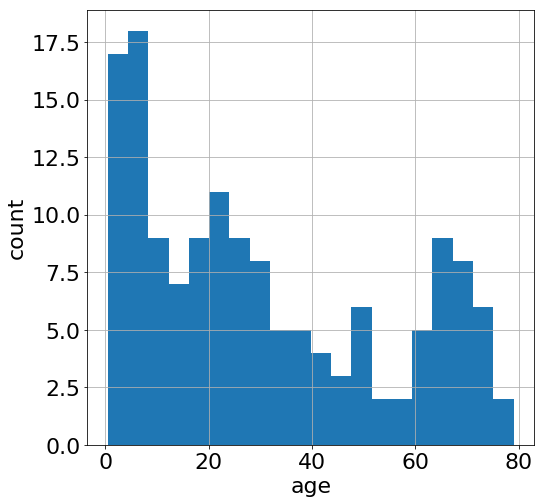

In [10]:
plt.figure(figsize=FIGSIZE)
data['age'].hist(bins=20)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

In [11]:
from modules import sv_image, vascular_data
import numpy as np

In [12]:
SPACING        = 0.05
IMAGE          = "cabg5"
RESLICE_EXTENT = 160
n              = np.array([0,0,1])
v              = np.array([0,1,0])

image_path = './data/images/{}/image.mha'.format(IMAGE)
seg_path   = './data/images/{}/segmentation.mha'.format(IMAGE)
paths_path = './data/images/{}/paths.paths'.format(IMAGE)

In [13]:
image_sv = sv_image.Image(image_path)
image_sv.set_spacing(SPACING)
image_sv.set_reslice_ext(RESLICE_EXTENT)

seg_sv   = sv_image.Image(seg_path)
seg_sv.set_spacing(SPACING)
seg_sv.set_reslice_ext(RESLICE_EXTENT)

In [14]:
origin           = np.array(image_sv.image.GetOrigin())
extent           = np.array(image_sv.image.GetExtent())
original_spacing = np.array(image_sv.image.GetSpacing())
center           = origin+extent[1::2]*original_spacing/2

print(origin)
print(extent)
print(center)

[-16.0331   0.     -24.5625]
[  0 511   0 511   0 393]
[ -8.01655757   8.01654243 -12.28125   ]


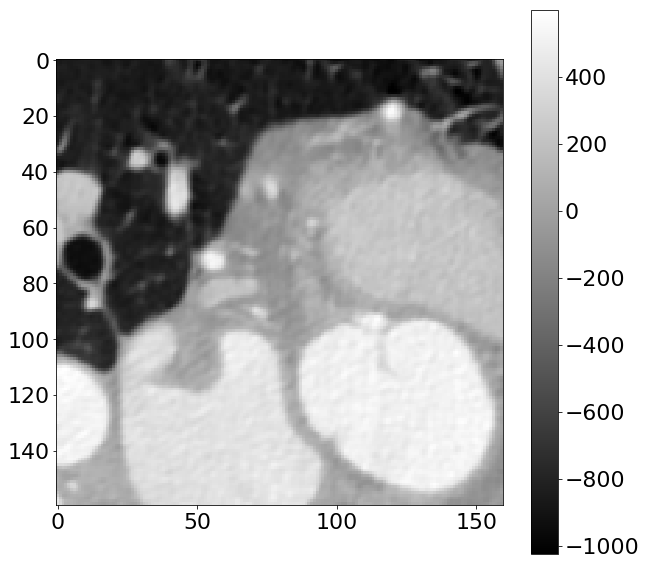

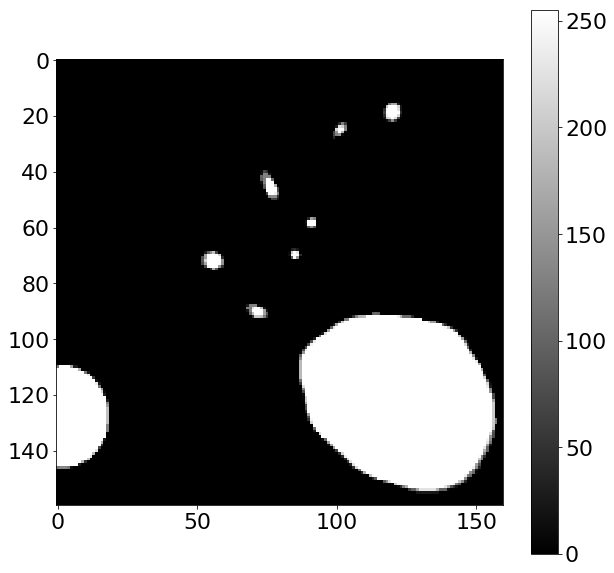

In [15]:
#p = np.array([0,0,0])
p = center

x = image_sv.get_reslice(p,n,v)
y = seg_sv.get_reslice(p,n,v)

plt.figure(figsize=(10,10))
plt.imshow(x, cmap='gray')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(y, cmap='gray')
plt.colorbar()
plt.show()

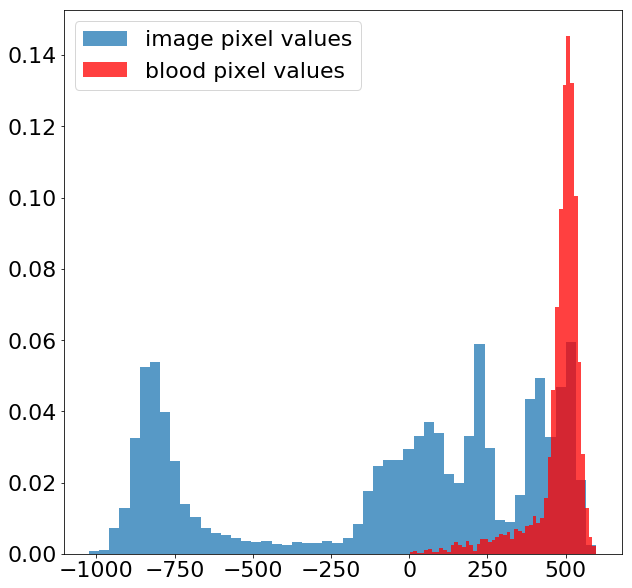

In [16]:
im_pix     = np.ravel(x)
im_weights = np.zeros_like(im_pix) + 1. / im_pix.size

blood_pix     = np.ravel(x[y>100])
blood_weights = np.zeros_like(blood_pix) + 1. / blood_pix.size

plt.figure(figsize=(10,10))
plt.hist(im_pix, weights=im_weights, bins=50, alpha=0.75, 
         label='image pixel values')
plt.hist(blood_pix, weights=blood_weights, color='red', bins=50, alpha=0.75, 
         label='blood pixel values')
plt.legend()
plt.show()

In [17]:
vessel_paths = vascular_data.parsePathFile(paths_path) 

In [18]:
print('vessel path ids and names')
for k in vessel_paths:
    print("path_id={}, name={}".format(k, vessel_paths[k]['name']))

vessel path ids and names
path_id=8, name=lc1_sub2
path_id=23, name=rsubcl
path_id=15, name=lc2_sub1_sub1
path_id=7, name=lc1
path_id=4, name=rc1
path_id=3, name=graft2
path_id=25, name=lc2_sub1_sub3
path_id=24, name=lc2_sub1_sub2
path_id=17, name=lc2_sub2_sub1
path_id=21, name=archfourth
path_id=10, name=lc1_sub3
path_id=14, name=rc1_sub3
path_id=11, name=lc1_sub3_sub1
path_id=5, name=rc1_sub1
path_id=20, name=rcc
path_id=19, name=leftsubcl
path_id=12, name=lc2
path_id=9, name=lc1_sub1
path_id=6, name=rc1_sub2
path_id=0, name=aorta
path_id=22, name=lcca
path_id=16, name=lc2_sub2
path_id=2, name=graft1
path_id=13, name=lc2_sub1
path_id=18, name=rc1_sub4


In [19]:
PATH_ID  = "7"
path     = vessel_paths[PATH_ID]
name     = path['name']
points   = path['points']
n_points = len(points)

print("path {} has {} points".format(name, n_points))

path lc1 has 200 points


lc1 path point 0


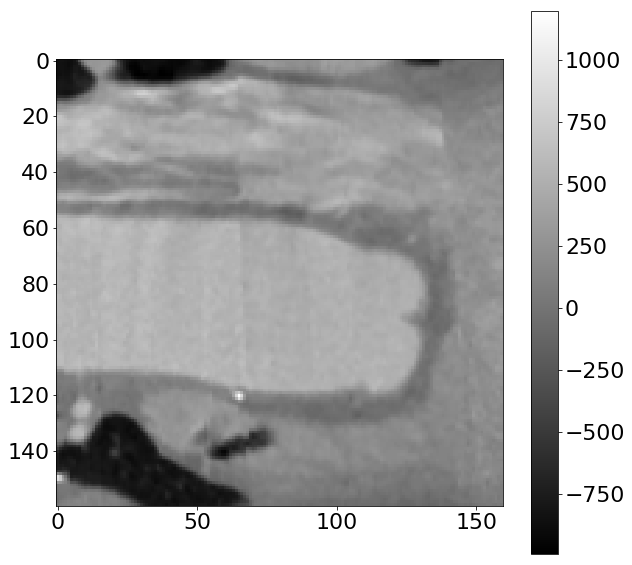

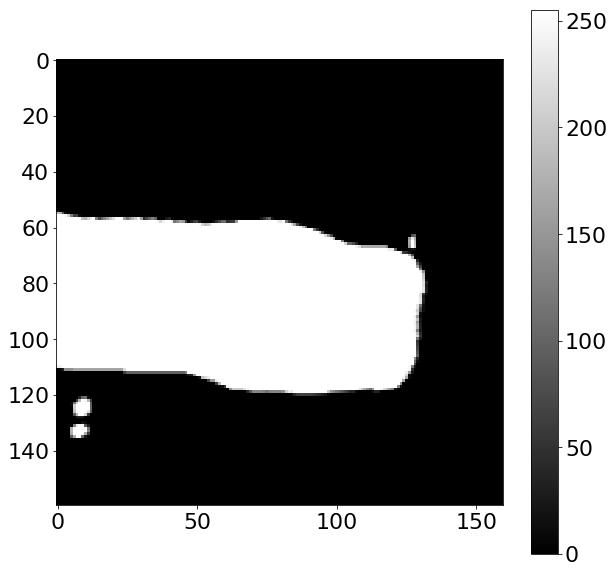

lc1 path point 10


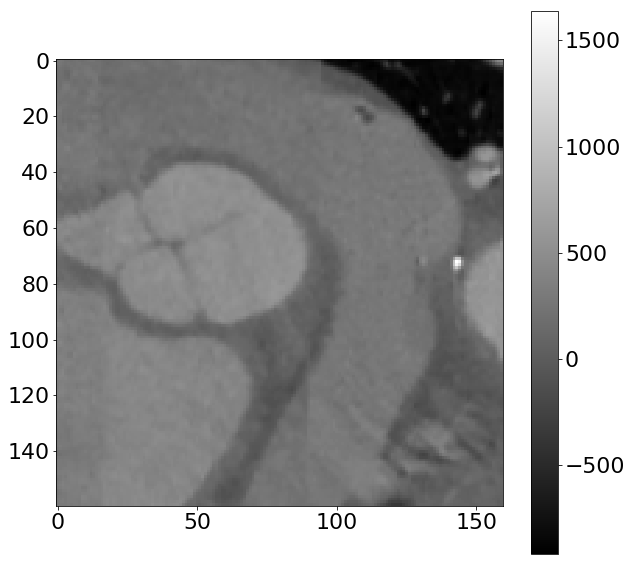

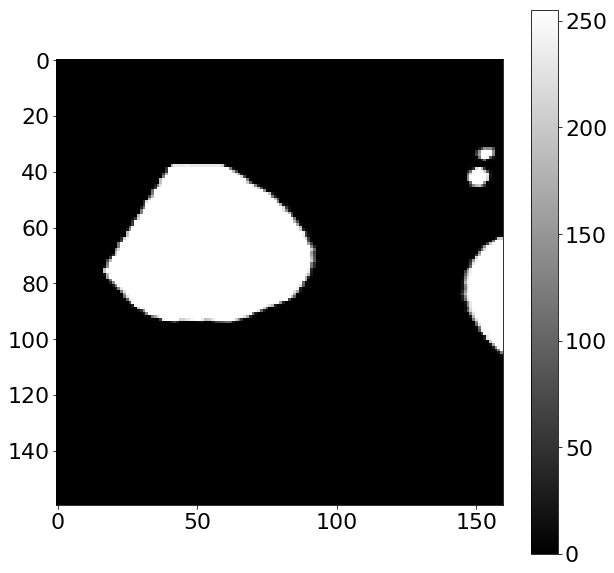

lc1 path point 20


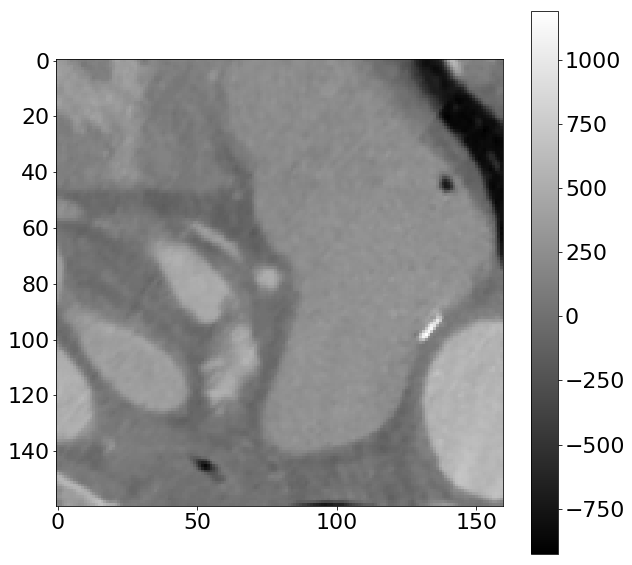

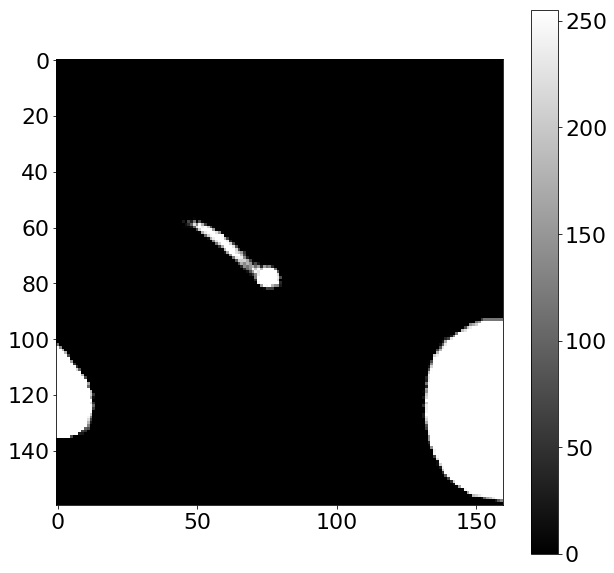

lc1 path point 30


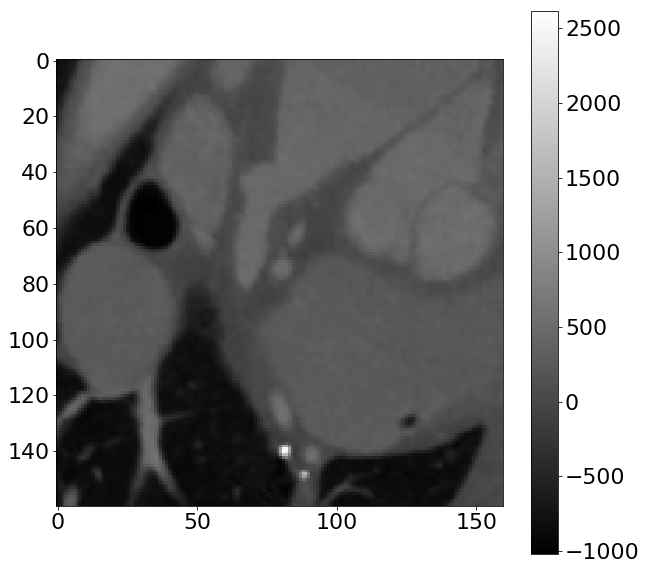

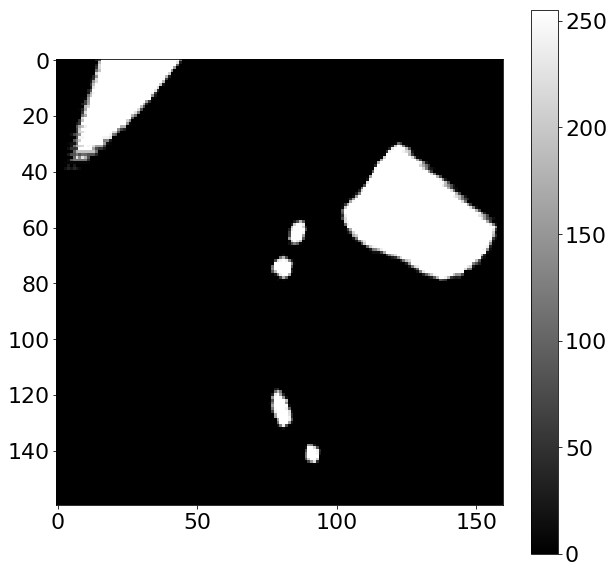

lc1 path point 40


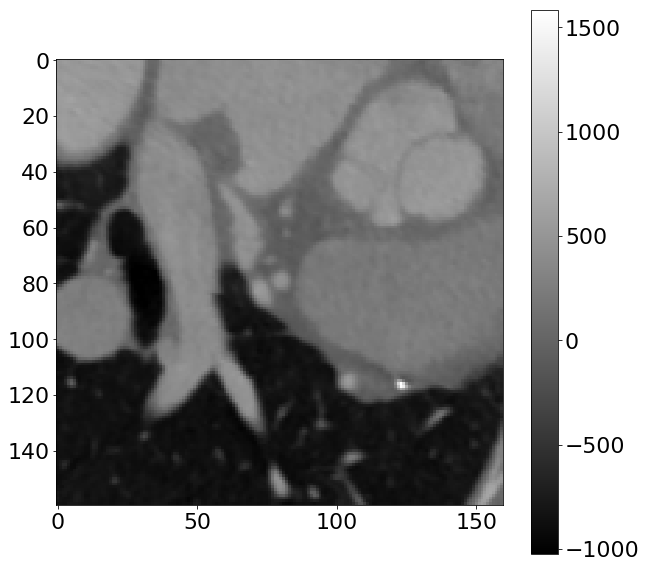

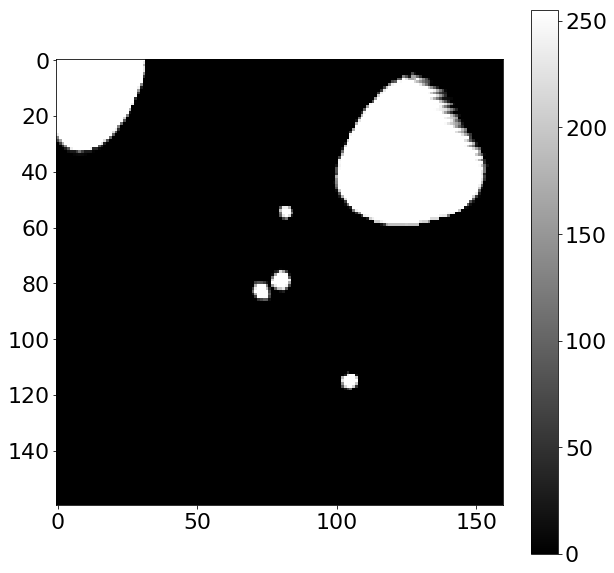

lc1 path point 50


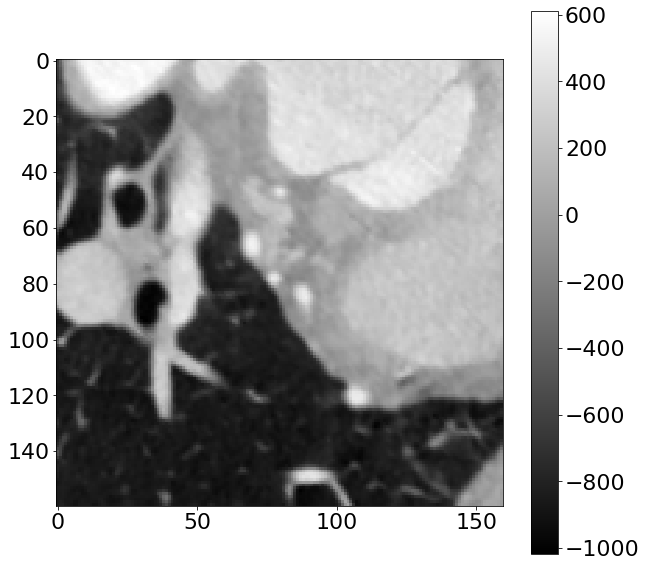

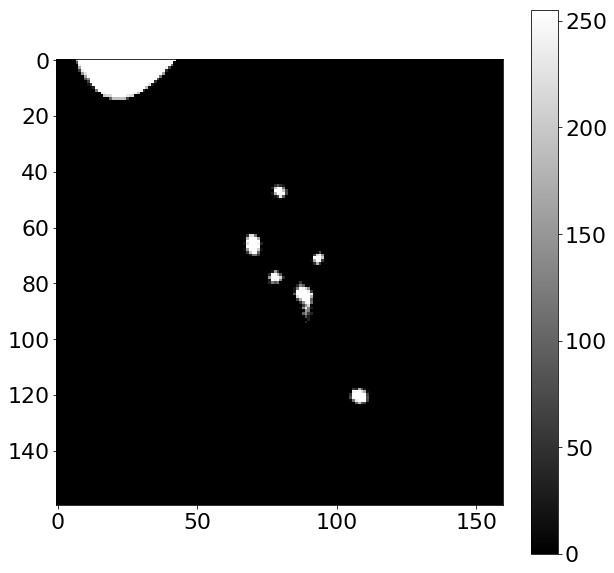

lc1 path point 60


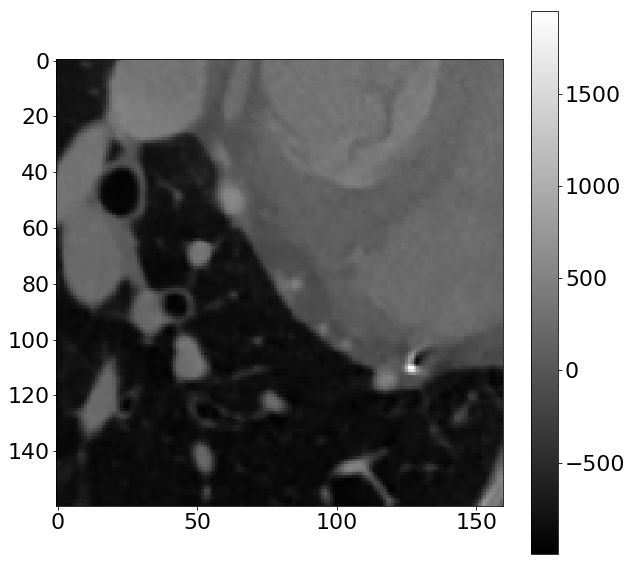

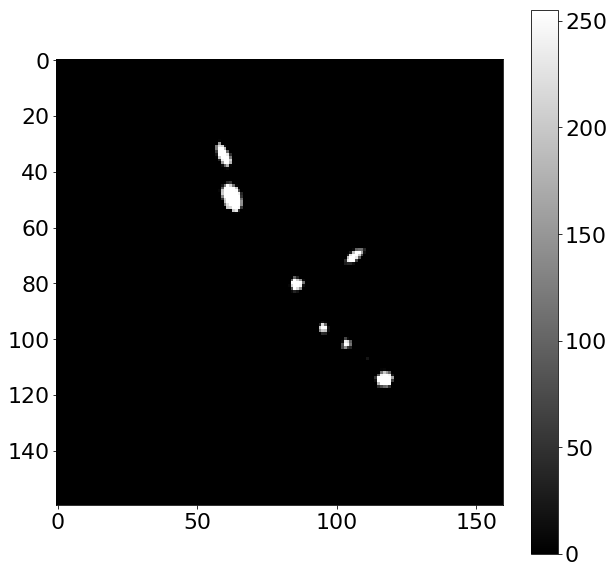

lc1 path point 70


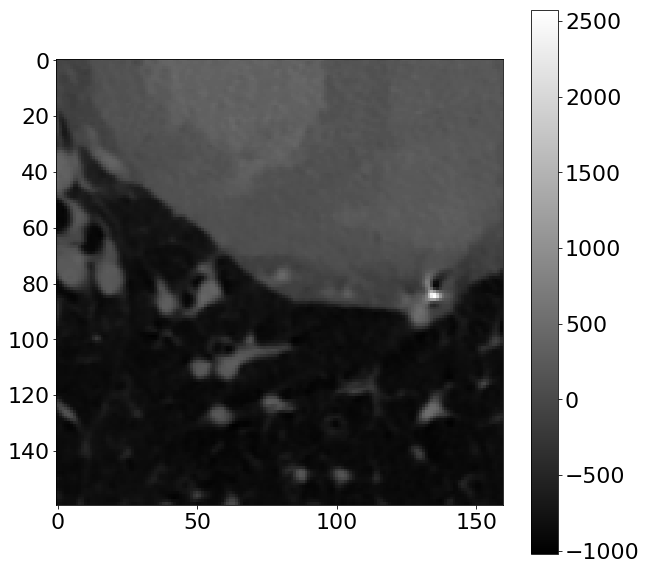

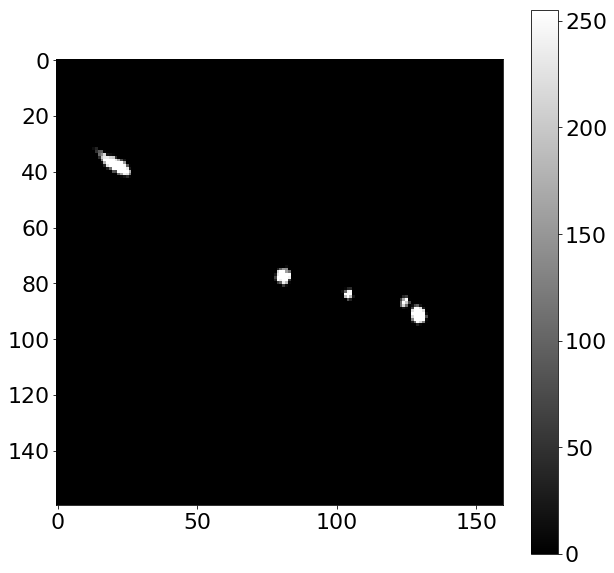

lc1 path point 80


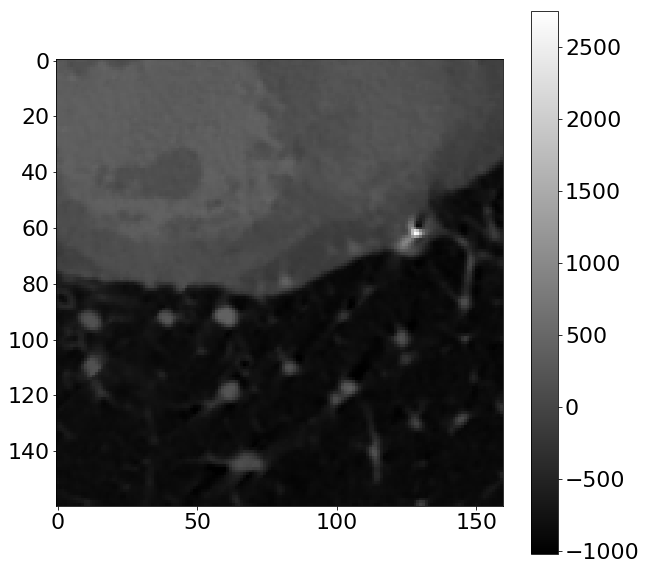

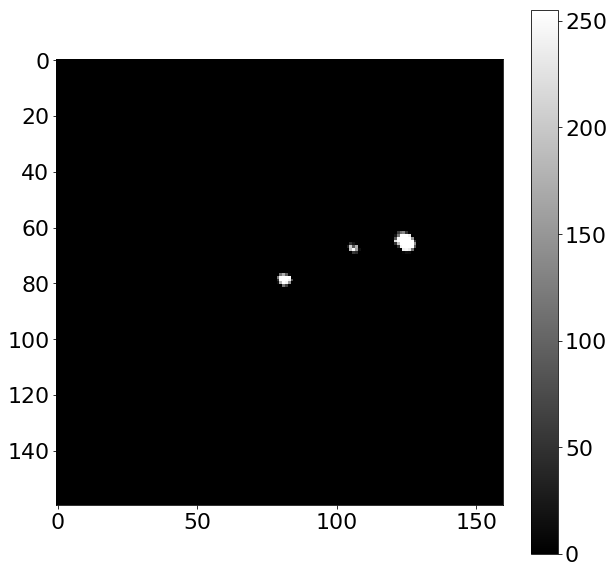

lc1 path point 90


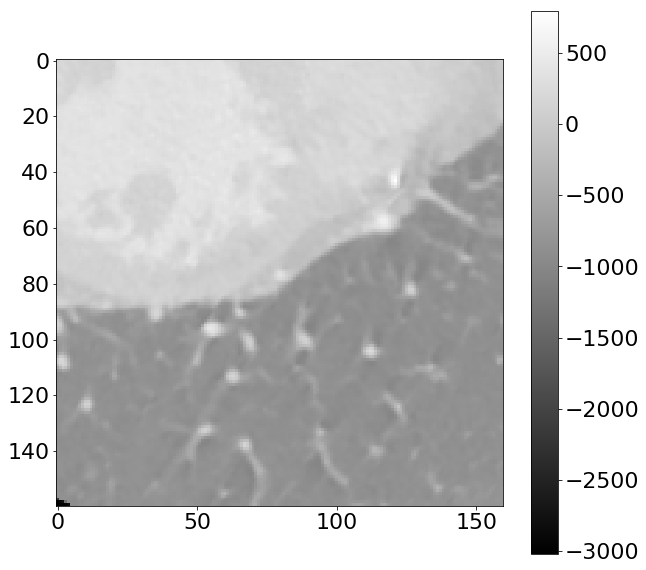

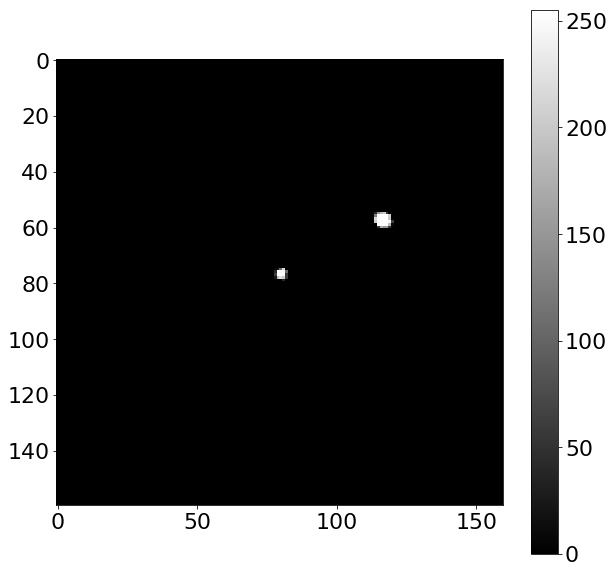

lc1 path point 100


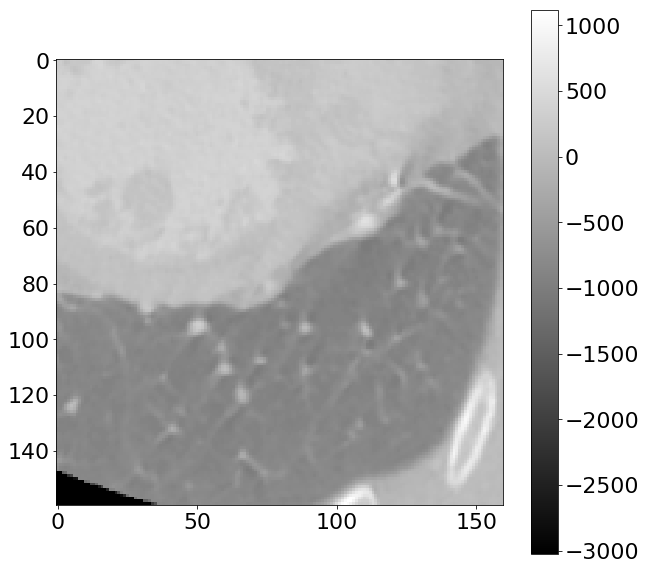

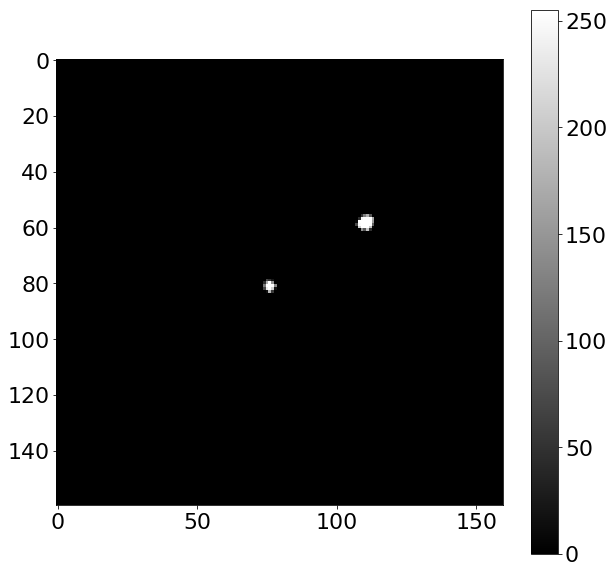

lc1 path point 110


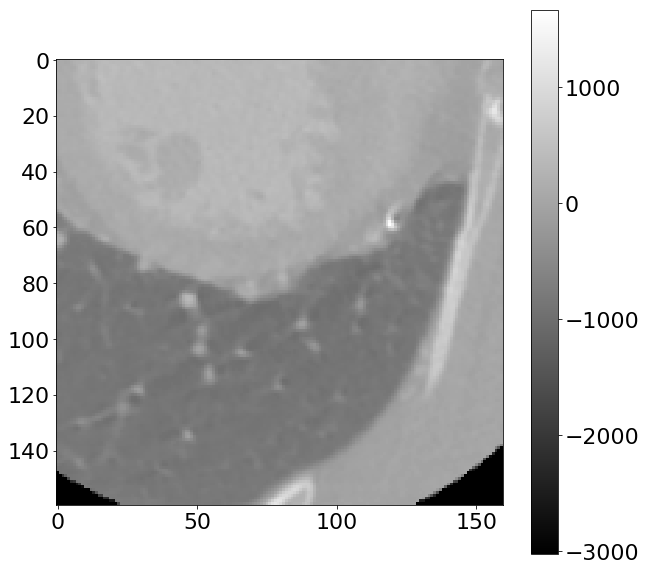

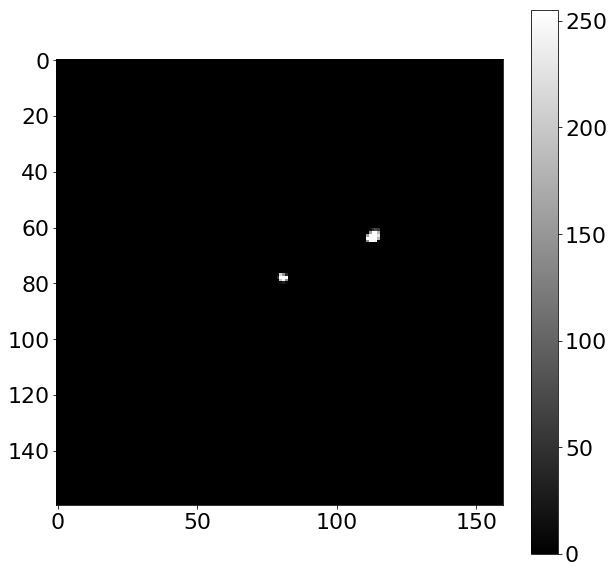

lc1 path point 120


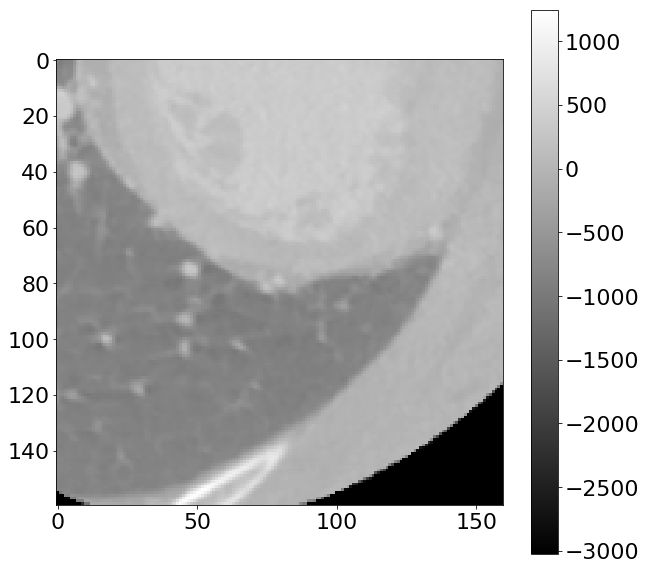

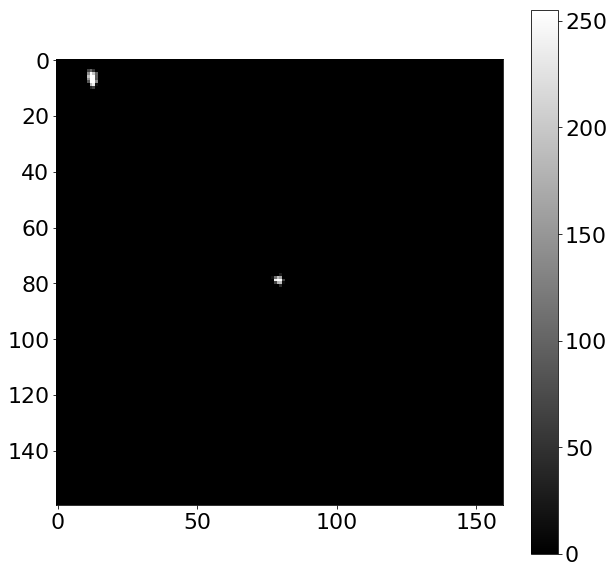

lc1 path point 130


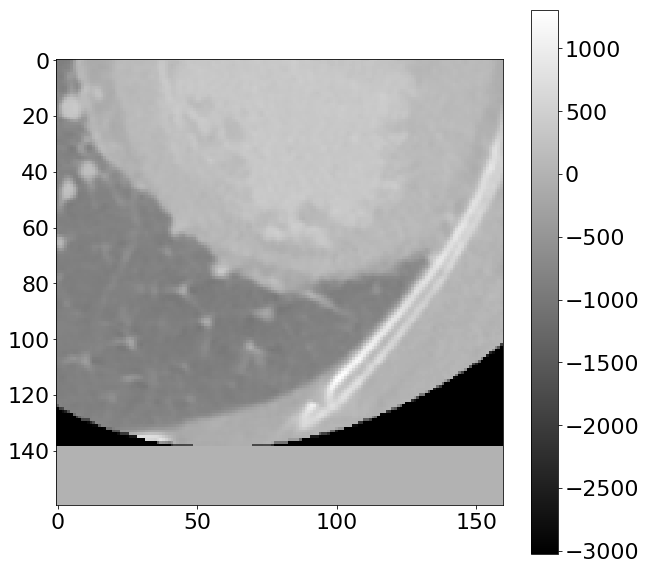

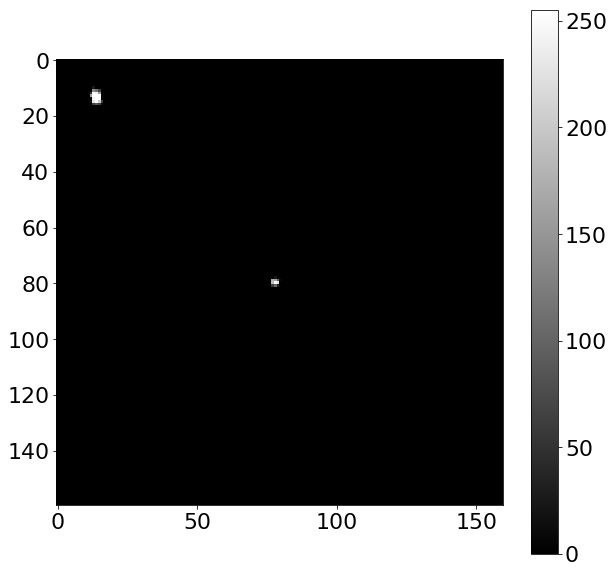

lc1 path point 140


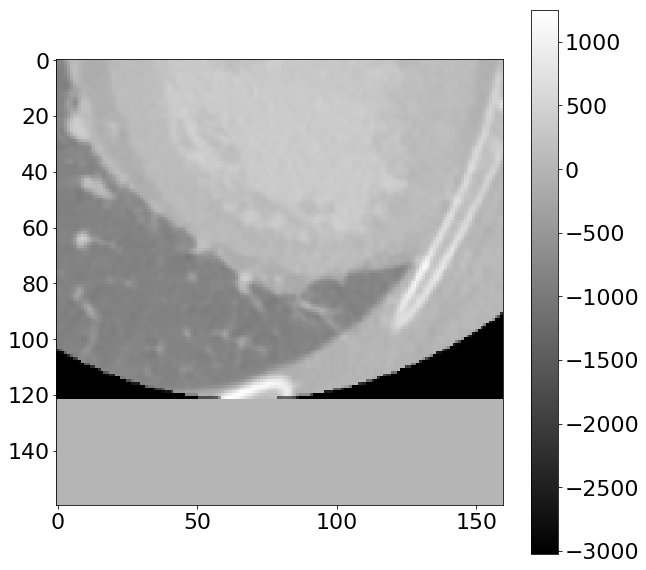

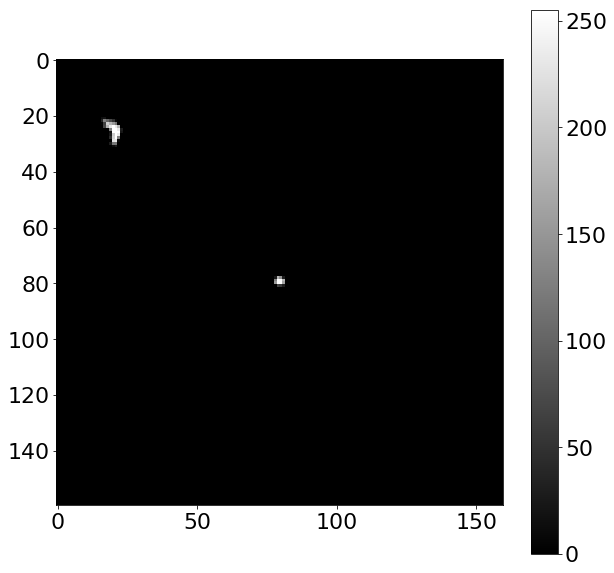

lc1 path point 150


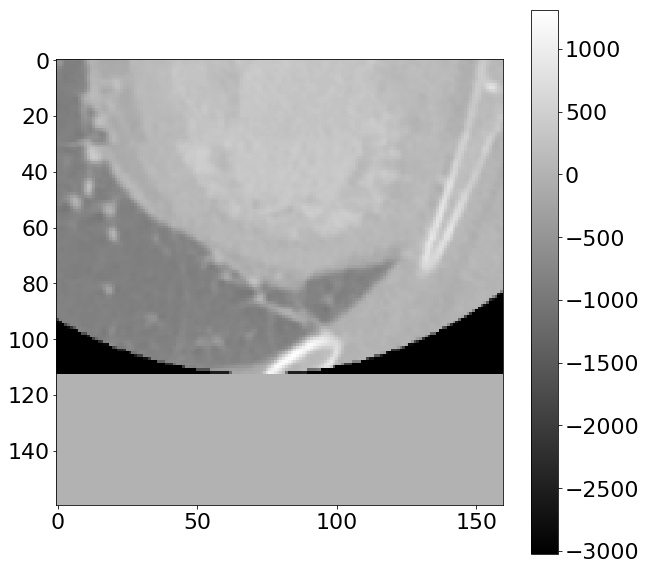

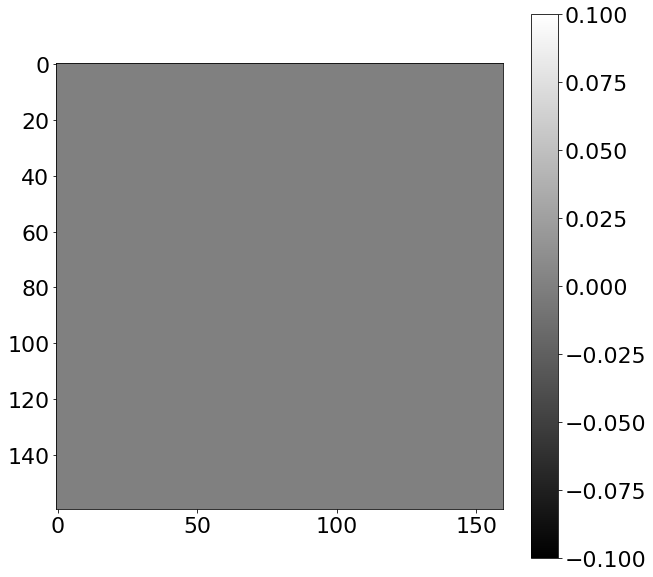

lc1 path point 160


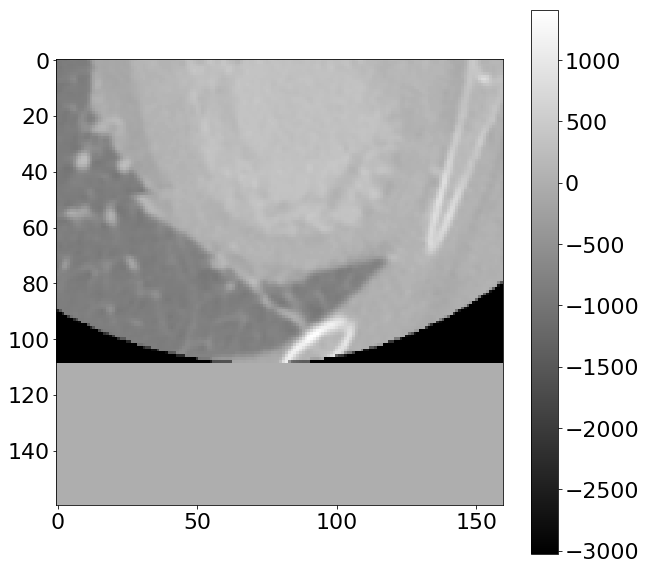

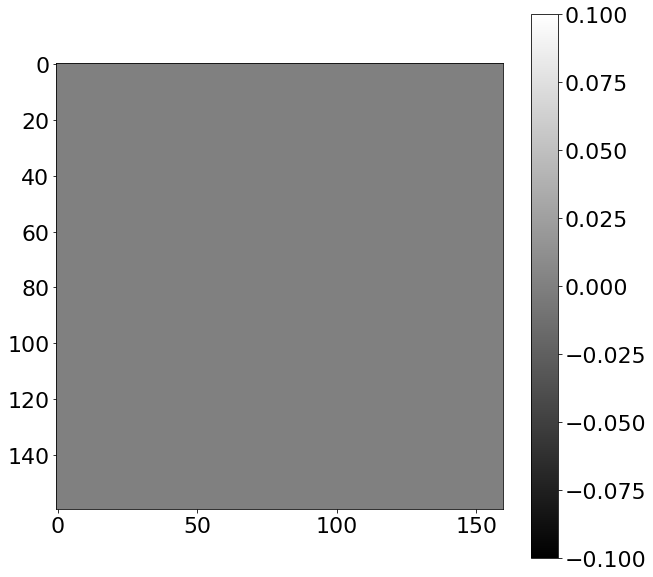

lc1 path point 170


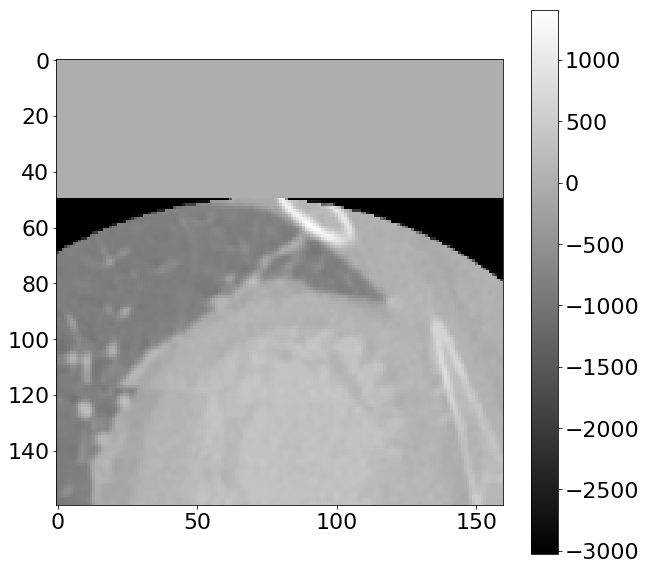

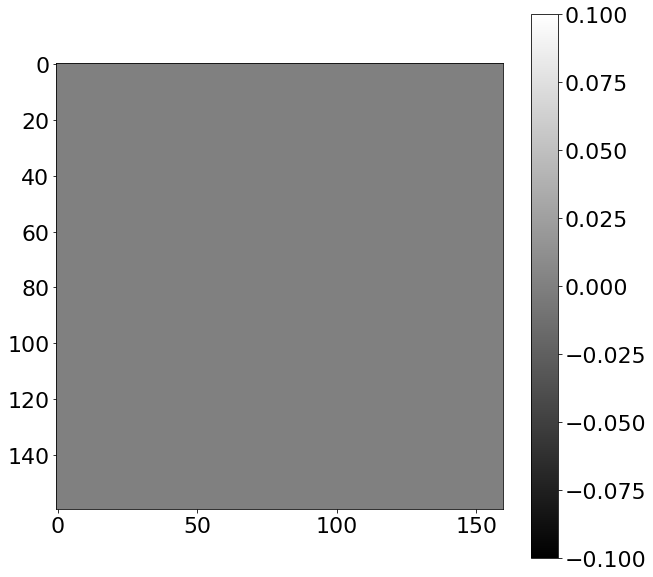

lc1 path point 180


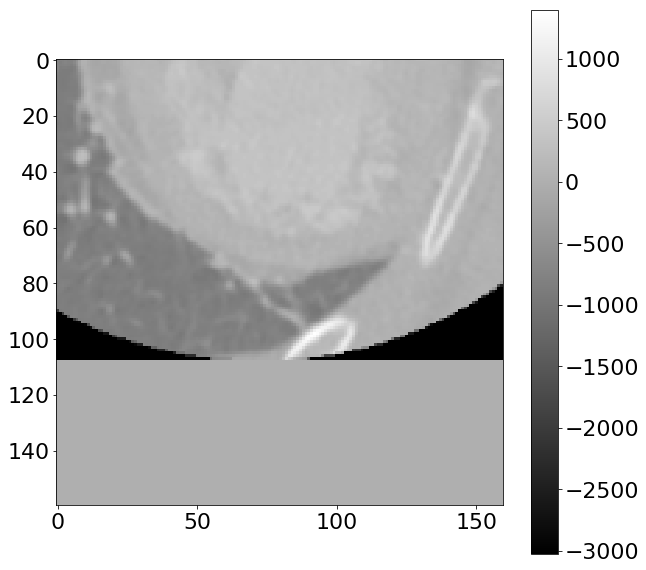

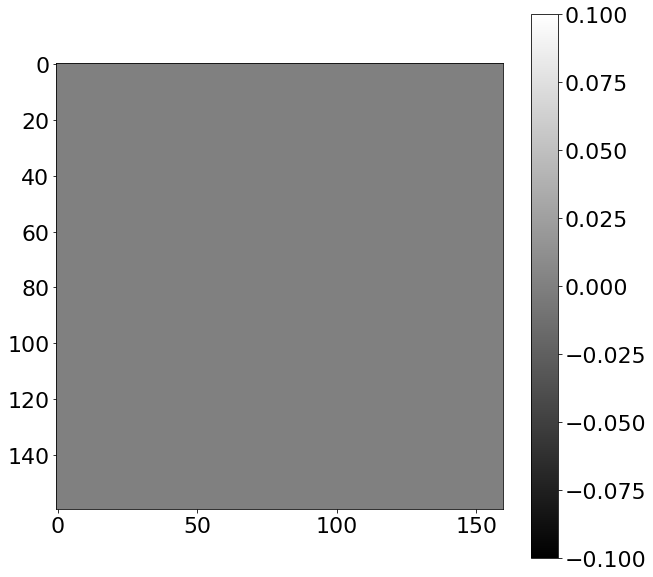

lc1 path point 190


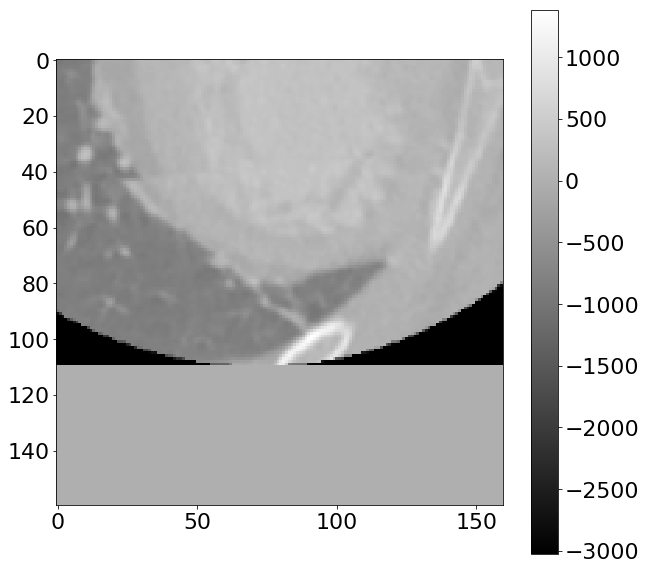

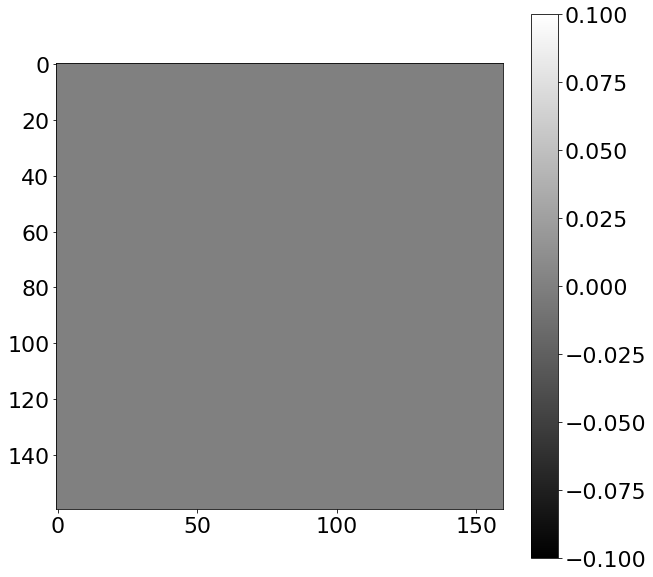

In [20]:
INTERVAL = 10
for i in range(0, n_points, INTERVAL):
    print("{} path point {}".format(name,i))
    point = points[i]
    
    p = point[:3]
    n = point[3:6]
    v = point[6:9]
    
    x = image_sv.get_reslice(p,n,v)
    y = seg_sv.get_reslice(p,n,v)

    plt.figure(figsize=(10,10))
    plt.imshow(x, cmap='gray')
    plt.colorbar()
    plt.show()

    plt.figure(figsize=(10,10))
    plt.imshow(y, cmap='gray')
    plt.colorbar()
    plt.show()